### Data Exploration

     age     bmi      charges  sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0     19  27.900  16884.92400       0.0         1.0               0.0               0.0               1.0
1     33  22.705  21984.47061       1.0         0.0               1.0               0.0               0.0
2     32  28.880   3866.85520       1.0         0.0               1.0               0.0               0.0
3     31  25.740   3756.62160       0.0         0.0               0.0               1.0               0.0
4     60  25.840  28923.13692       0.0         0.0               1.0               0.0               0.0
..   ...     ...          ...       ...         ...               ...               ...               ...
426   23  33.400  10795.93733       0.0         0.0               0.0               0.0               1.0
427   18  31.920   2205.98080       0.0         0.0               0.0               0.0               0.0
428   18  36.850   1629.83350       0.0       

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


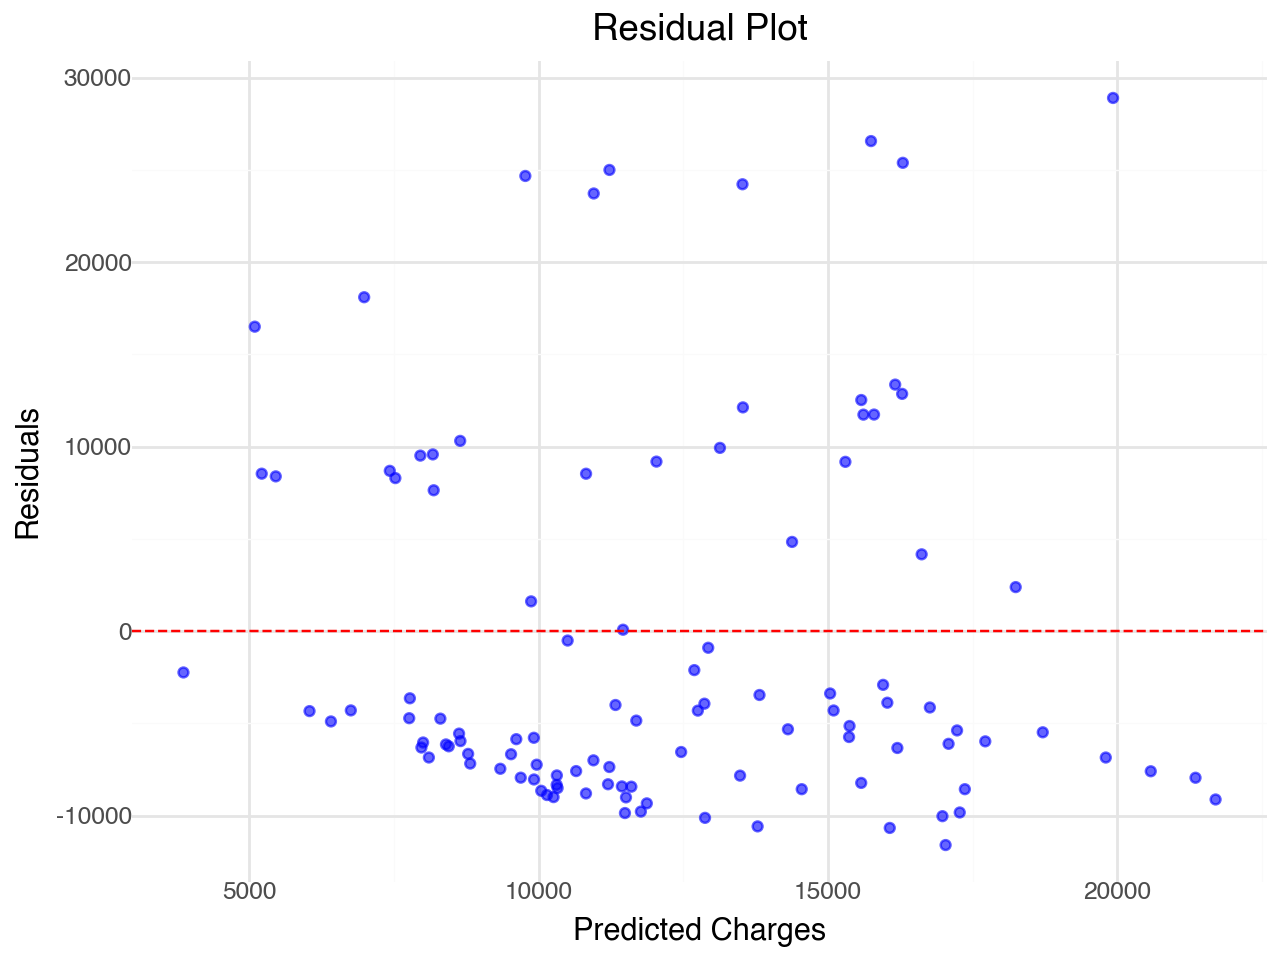

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


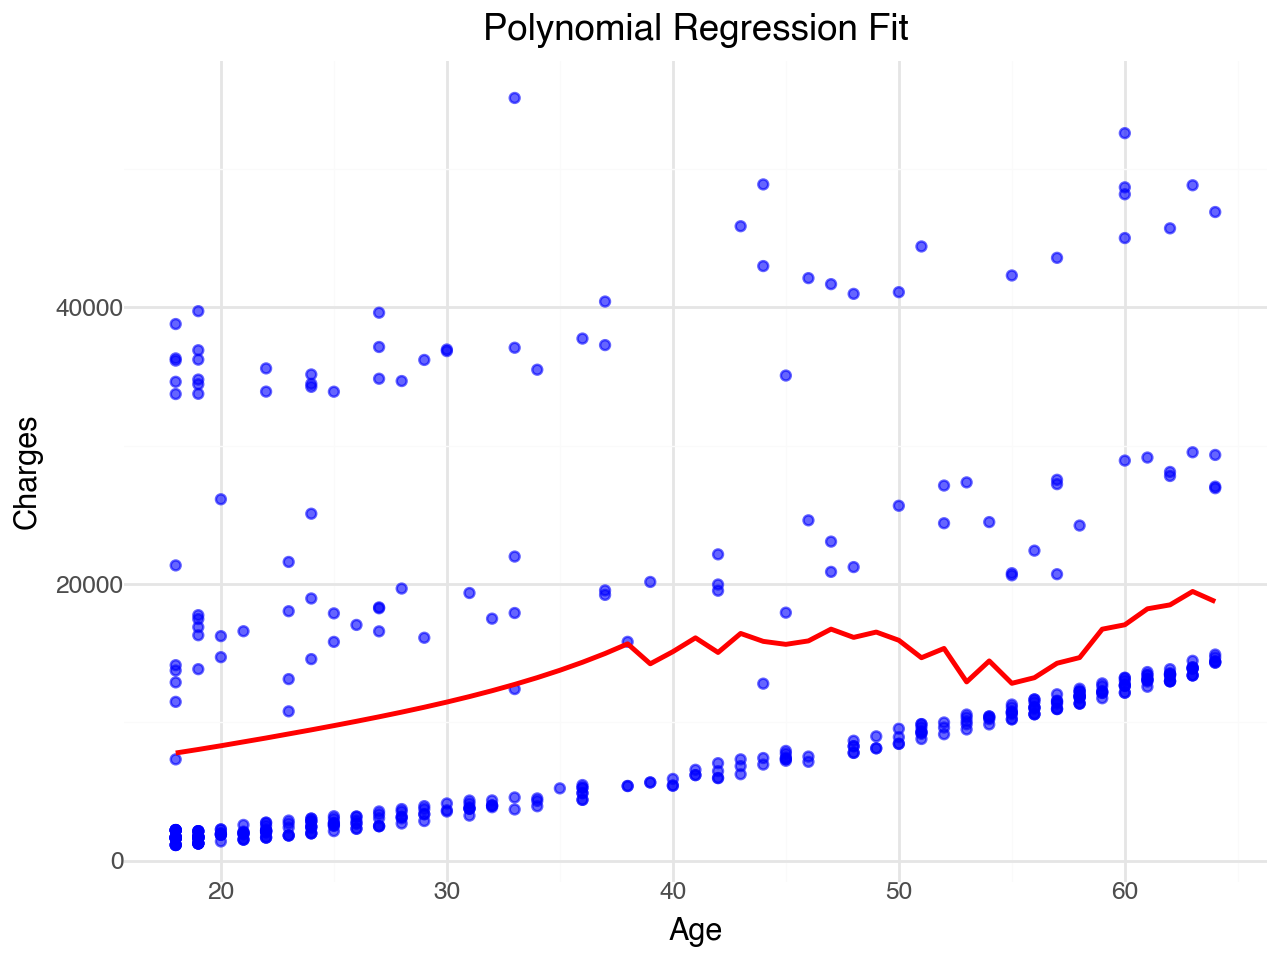

In [137]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from plotnine import *

seed = 420

insData = pd.read_csv('/Users/rileysallander/Desktop/ML/ML554/Data/insurance_costs_1.csv')

insData.describe(include='all')

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first') 

cols_to_encode = ['sex', 'smoker', 'region']

encoded_data = encoder.fit_transform(insData[cols_to_encode])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

insData= pd.concat([insData.drop(columns=cols_to_encode), encoded_df], axis=1)

print(insData)





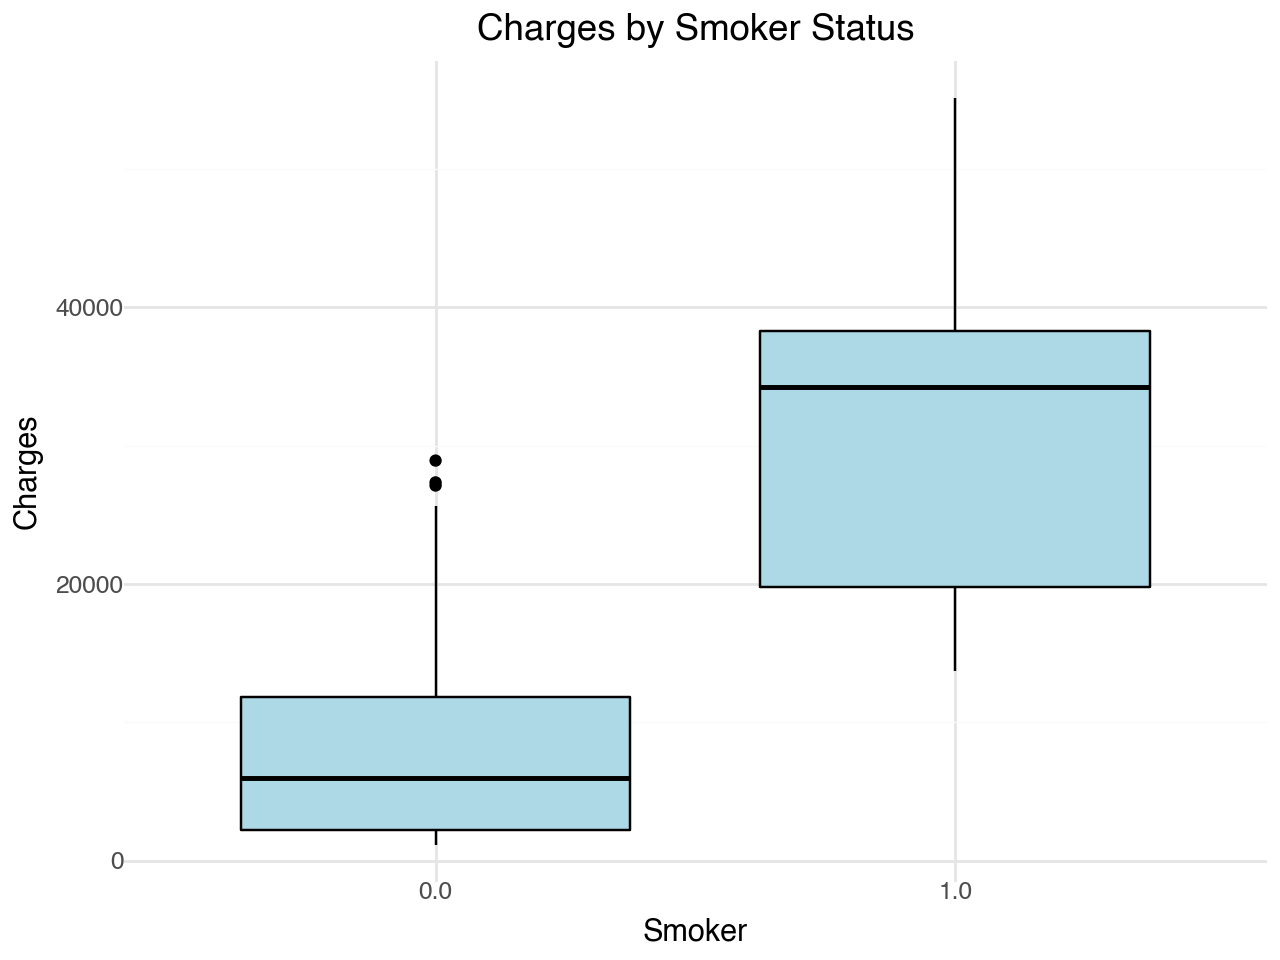

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


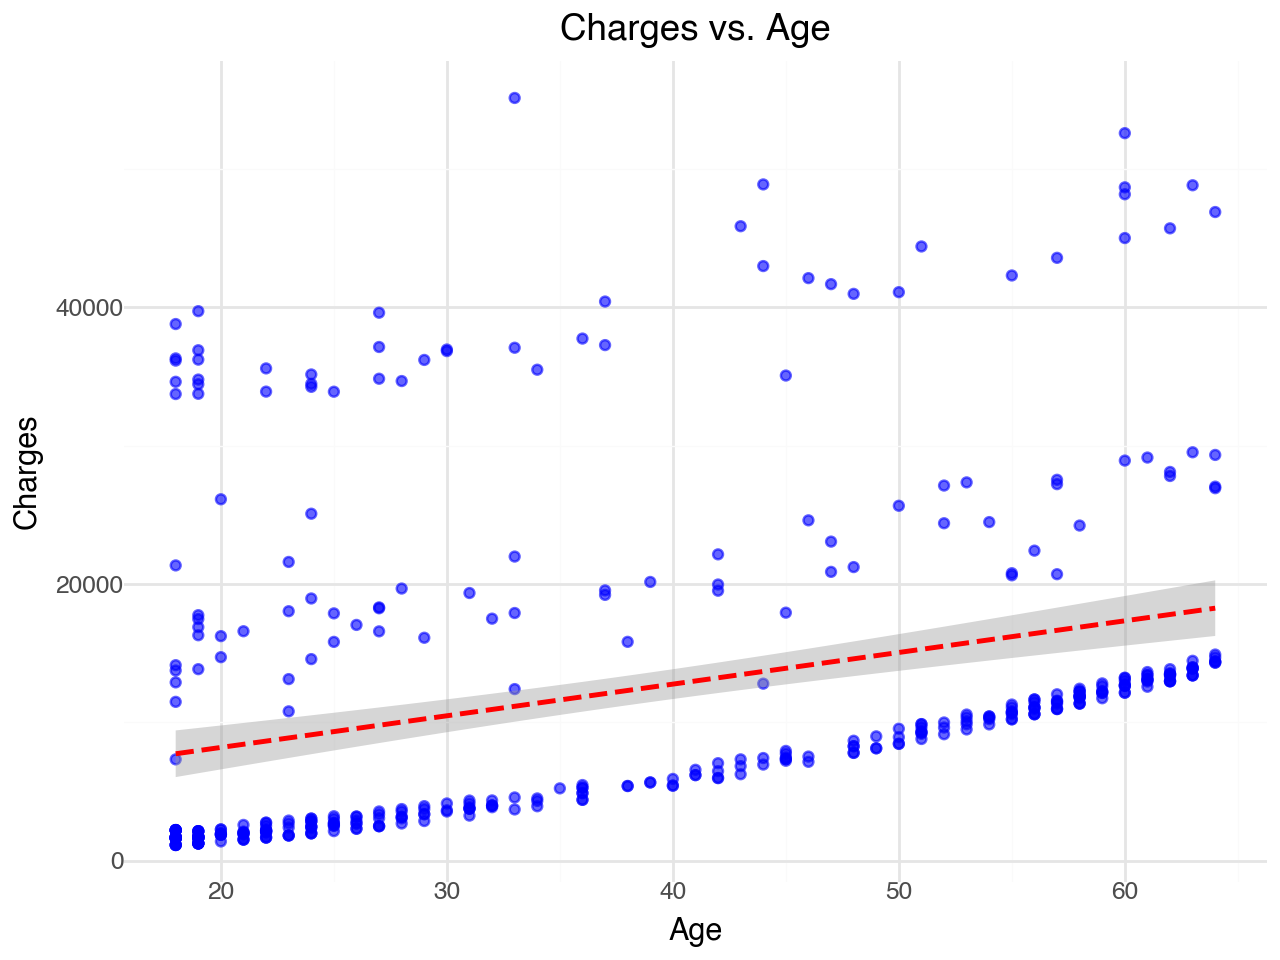

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


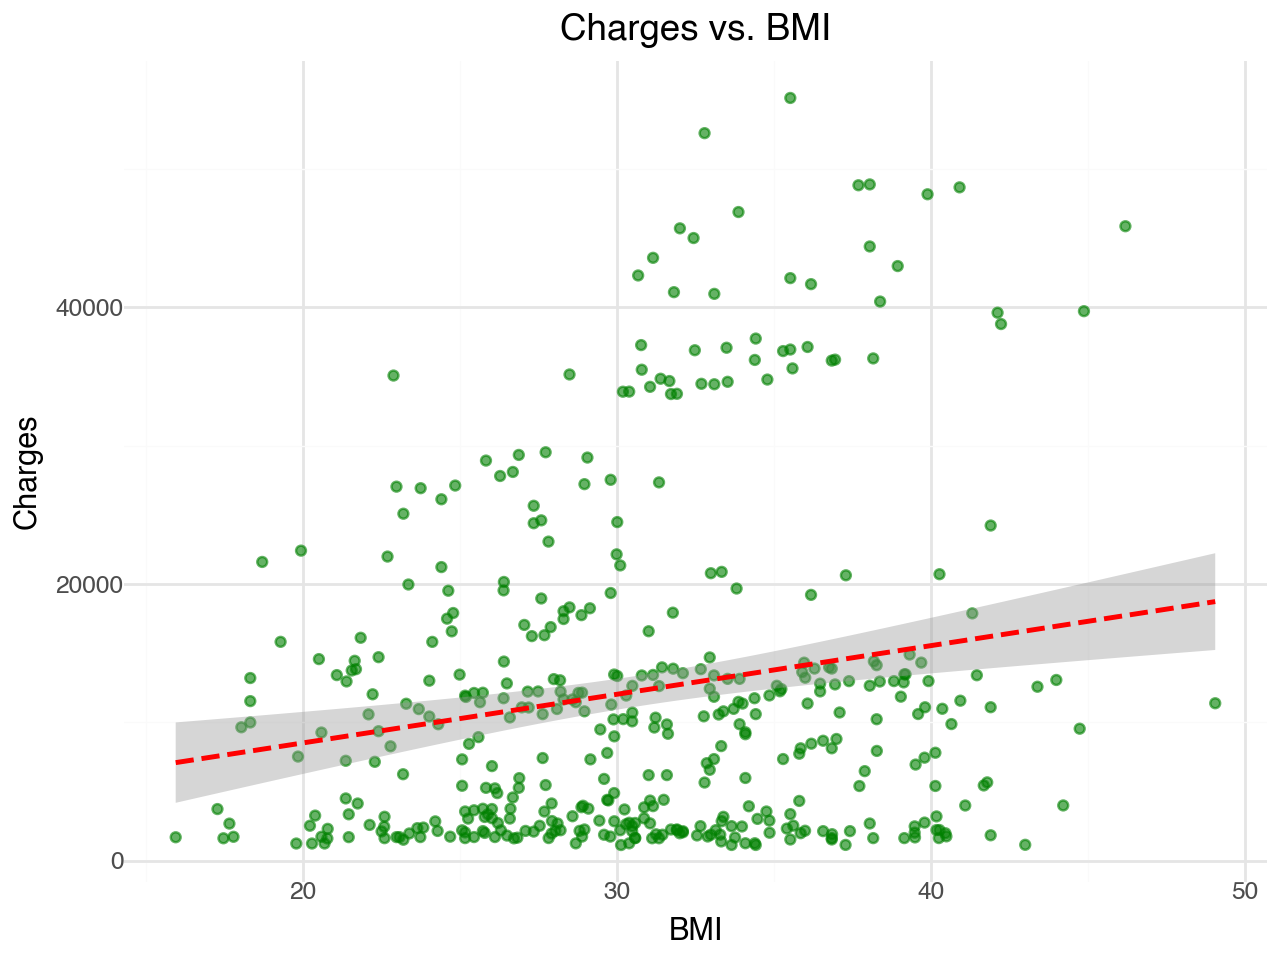

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


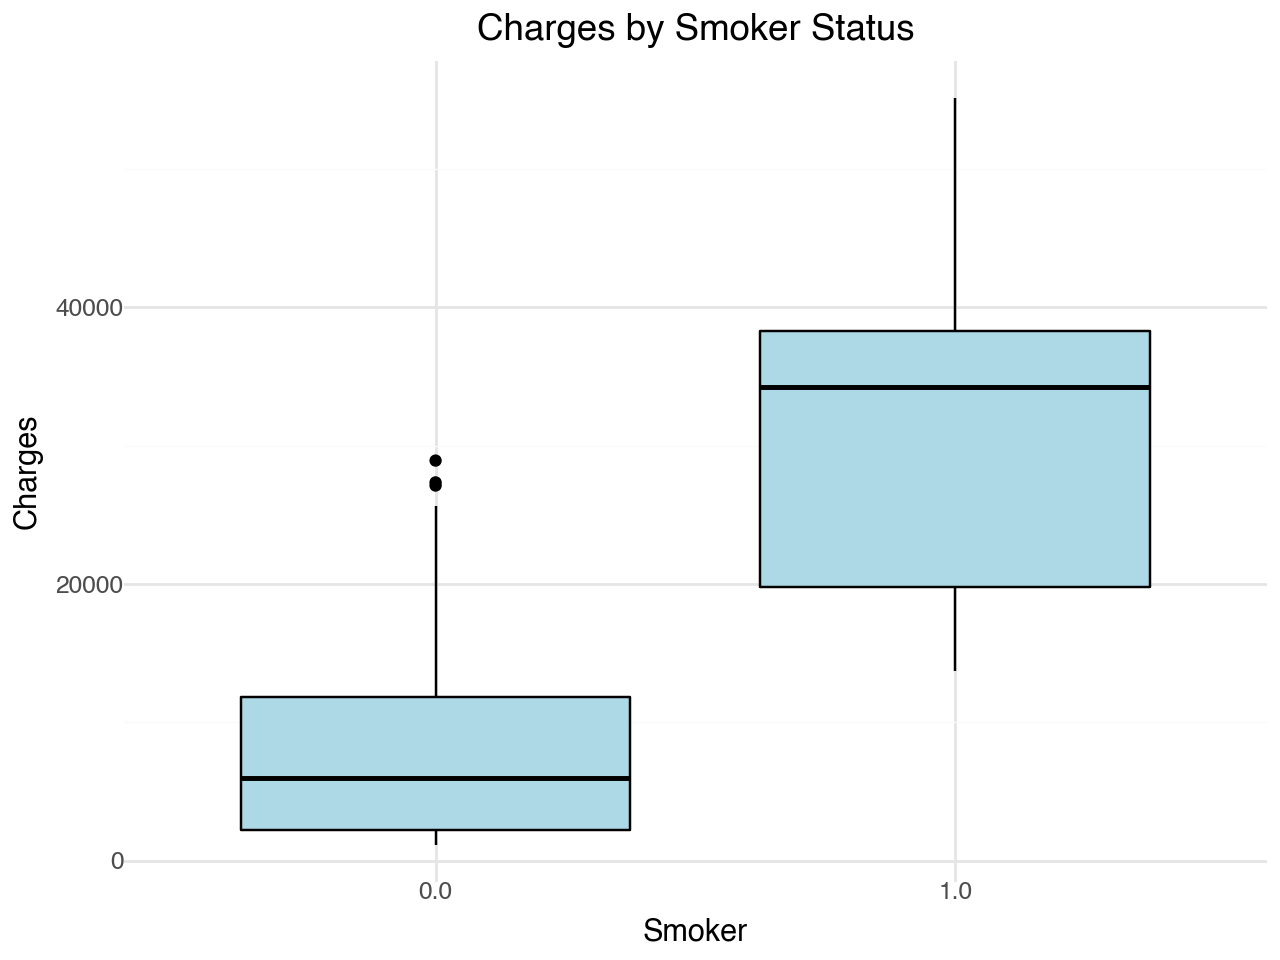

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


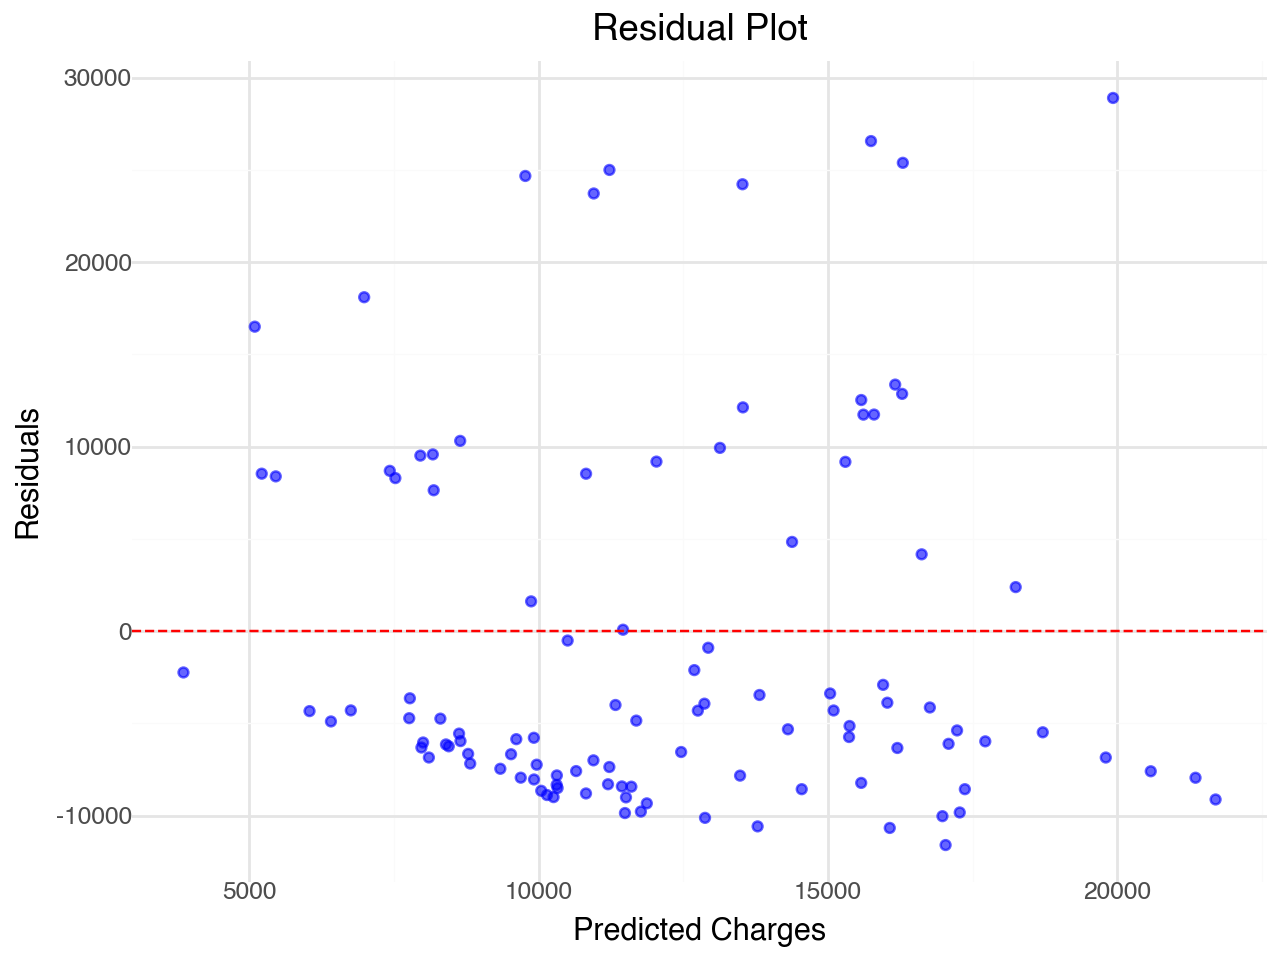

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


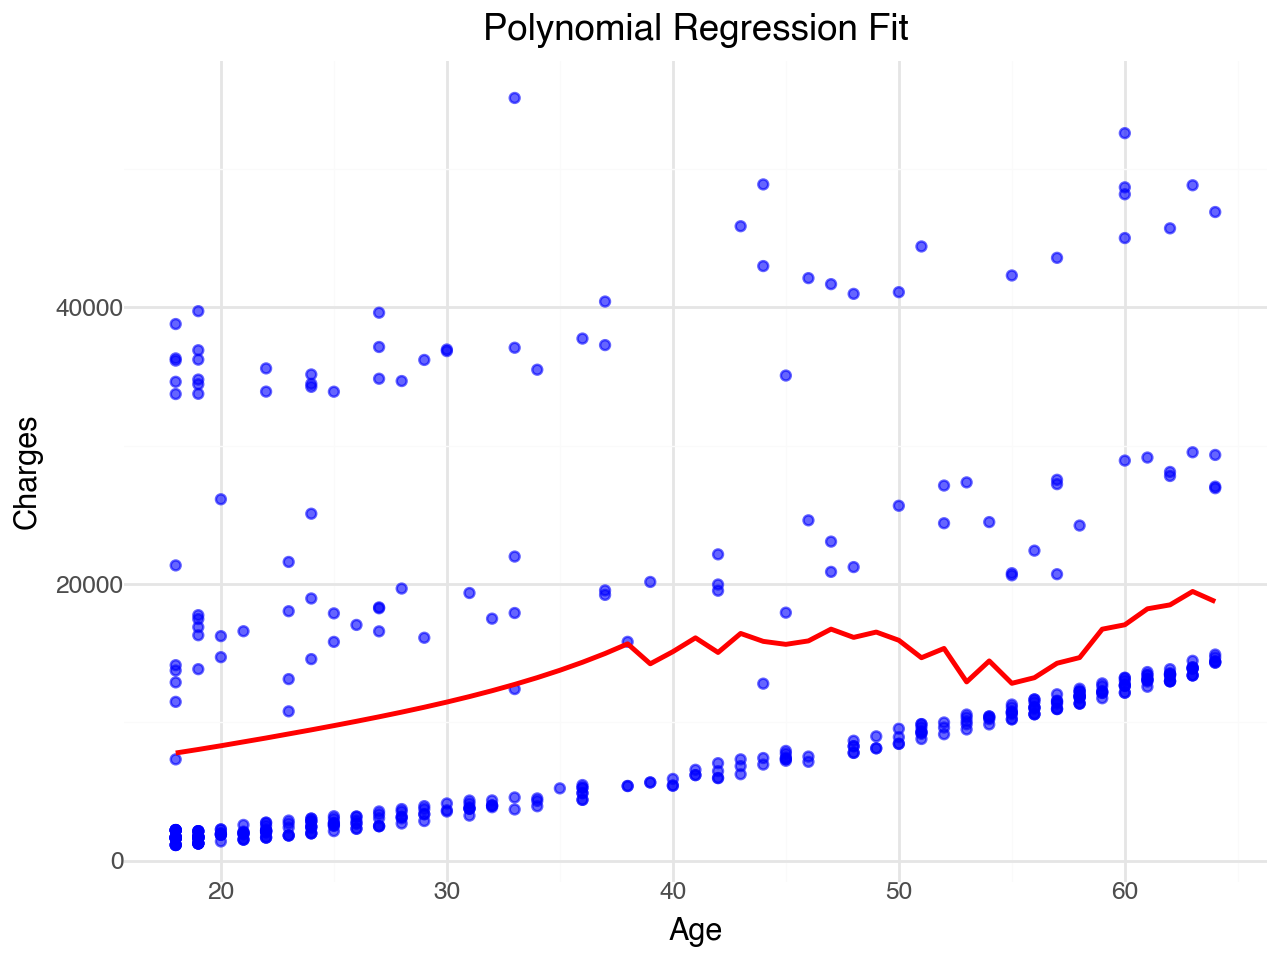

In [138]:
plot1 = (
    ggplot(insData, aes(x='age', y='charges')) +
    geom_point(color='blue', alpha=0.6) +
    geom_smooth(method='lm', color='red', linetype="dashed") +
    labs(title='Charges vs. Age', x='Age', y='Charges') +
    theme_minimal()
)
plot1

plot2 = (
    ggplot(insData, aes(x='bmi', y='charges')) +
    geom_point(color='green', alpha=0.6) +
    geom_smooth(method='lm', color='red', linetype="dashed") +
    labs(title='Charges vs. BMI', x='BMI', y='Charges') +
    theme_minimal()
)
plot2

insData['smoker_str']=insData['smoker_yes'].astype(str)

plot3 = (
    ggplot(insData, aes(x='smoker_str', y='charges')) +
    geom_boxplot(fill='lightblue', color='black') +
    labs(title='Charges by Smoker Status', x='Smoker', y='Charges') +
    theme_minimal()
)
plot3

### Simple Linear Models 

##### charges = intercept + age(x)

In [110]:
X = insData[["age"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")

print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))




Intercept: [4653.96108676]
Age Coefficient: [207.91665597]
0.07916771769089614
0.16360671650779357
137761849.09078392
94486921.1660161
Intercept: [4653.96108676]
Age Coefficient: [207.91665597]
0.07916771769089614
0.16360671650779357
137761849.09078392
94486921.1660161


##### charges = intercept + age(x1) + sex(x2)

In [111]:
X = insData[["age", "sex_male"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
sex_coefficent = lr_fit.coef_[0,1]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"Sex Coefficient: {sex_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))



Intercept: [4362.83762231]
Age Coefficient: 207.87093692625947
Sex Coefficient: 626.478112836239
0.07982078986860708
0.1647416250851491
137664145.70600942
94358711.1248839
Intercept: [4362.83762231]
Age Coefficient: 207.87093692625947
Sex Coefficient: 626.478112836239
0.07982078986860708
0.1647416250851491
137664145.70600942
94358711.1248839


##### charges = intercept + age(x1) + smoker(x2)

In [112]:
X = insData[["age", "smoker_yes"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
smoke_coefficent = lr_fit.coef_[0,1]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"Smoker Coefficient: {smoke_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))

Intercept: [-2191.93814819]
Age Coefficient: 249.60647852474187
Smoker Coefficient: 25692.890864335128
0.7933652093378767
0.6105639205785647
30913762.902314916
43994394.576984204
Intercept: [-2191.93814819]
Age Coefficient: 249.60647852474187
Smoker Coefficient: 25692.890864335128
0.7933652093378767
0.6105639205785647
30913762.902314916
43994394.576984204


<p> The model that includes smoker and age is by far and away the best of the two models it has an R^2 value of 0.75 on both training and test data. Which in comparison to the age and sex that has a R^2 value of .11. The mse is also much lower in the smoker model than the sex model. <p>

### Part Three: Multiple Linear Models

##### Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

Intercept: [-6381.47117869]
Age Coefficient: 191.39963957416555
bmi Coefficient: 378.01104736502236
0.11594765297670317
0.11095337592172316
132259357.49513055
100435142.10379194
Intercept: [-6381.47117869]
Age Coefficient: 191.39963957416555
bmi Coefficient: 378.01104736502236
0.11594765297670317
0.11095337592172316
132259357.49513055
100435142.10379194


<positron-console-cell-136>:51: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


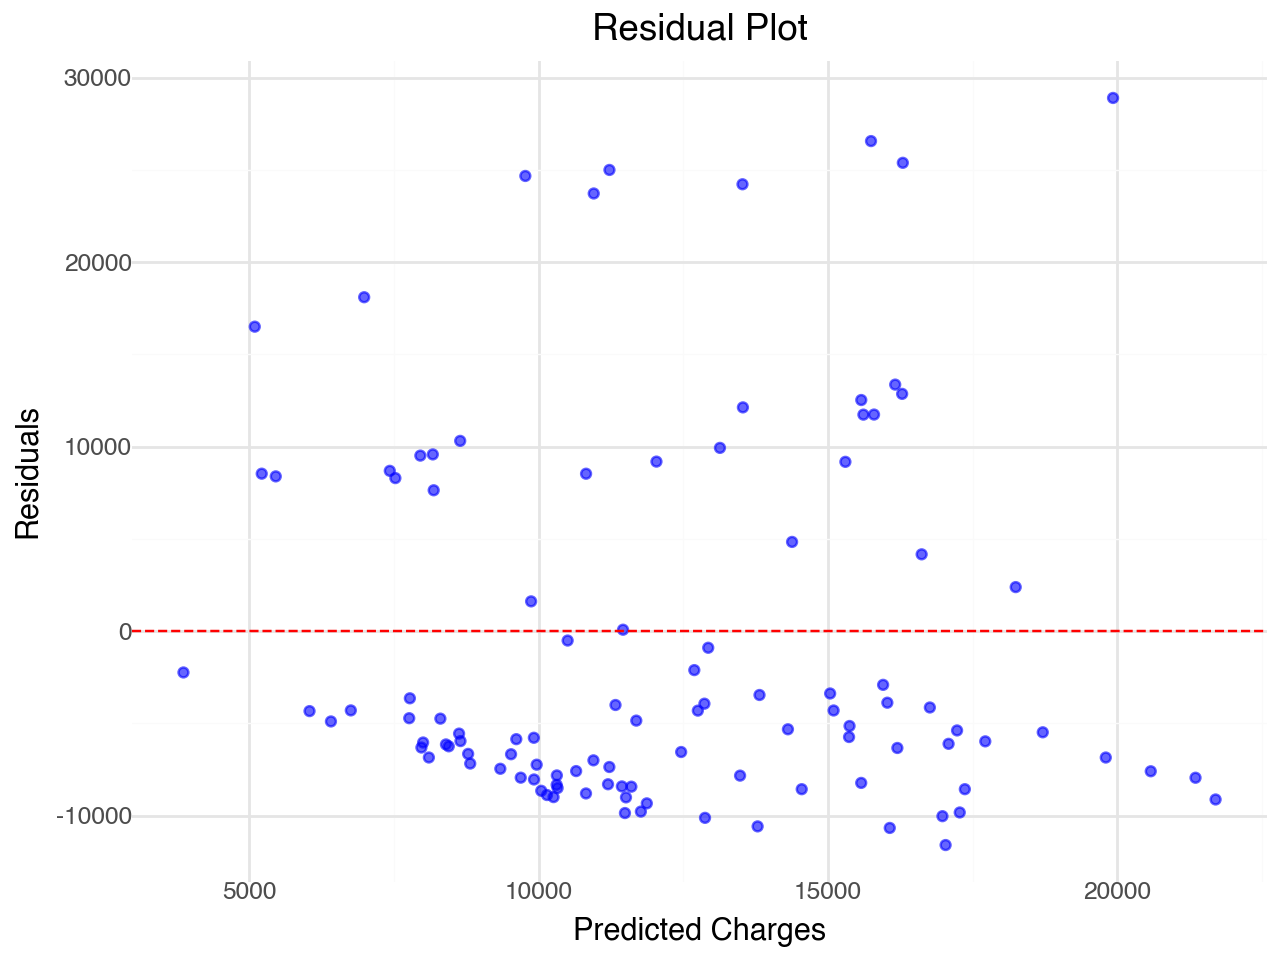

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


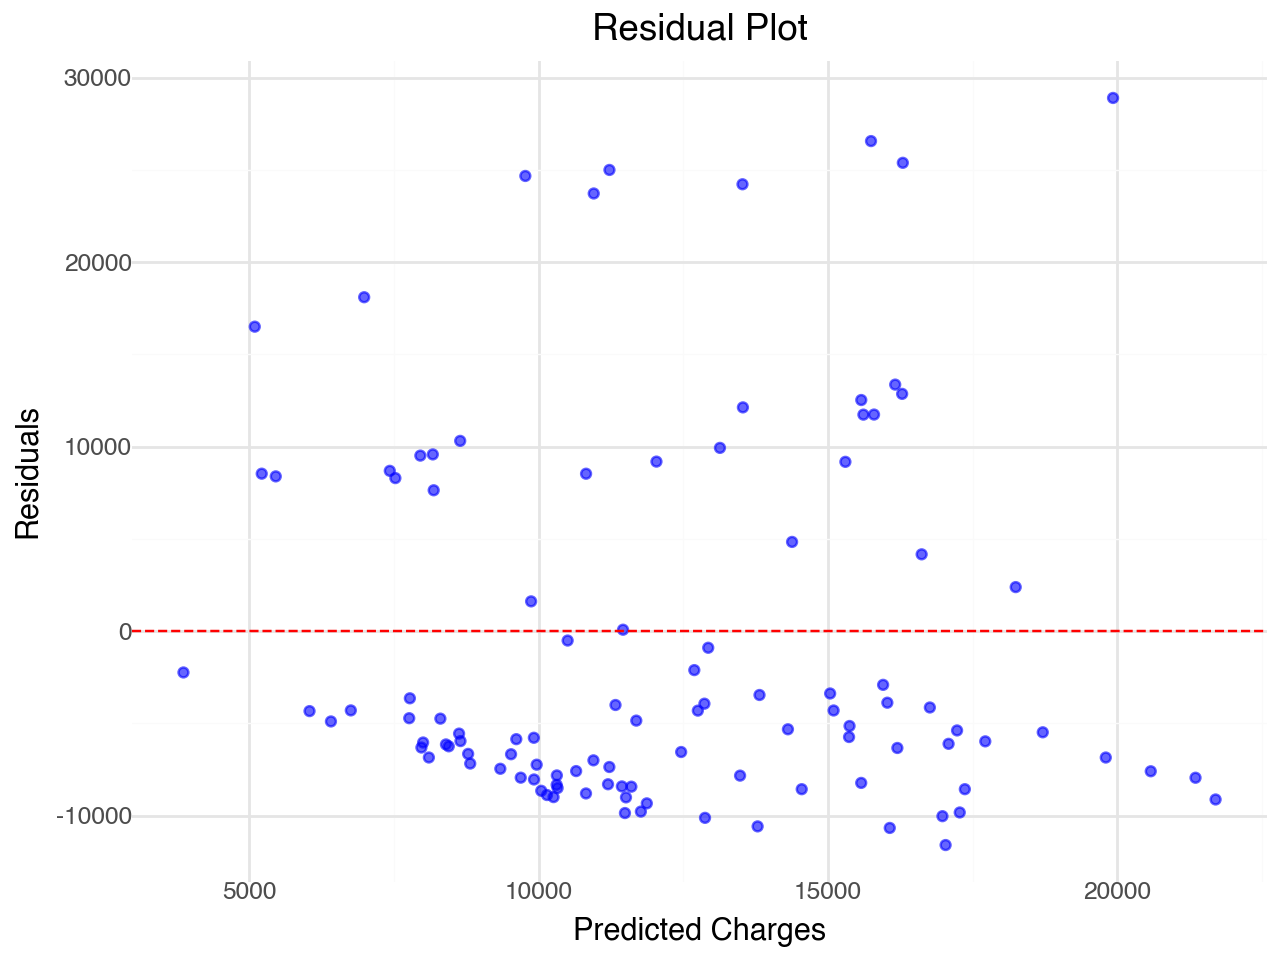

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


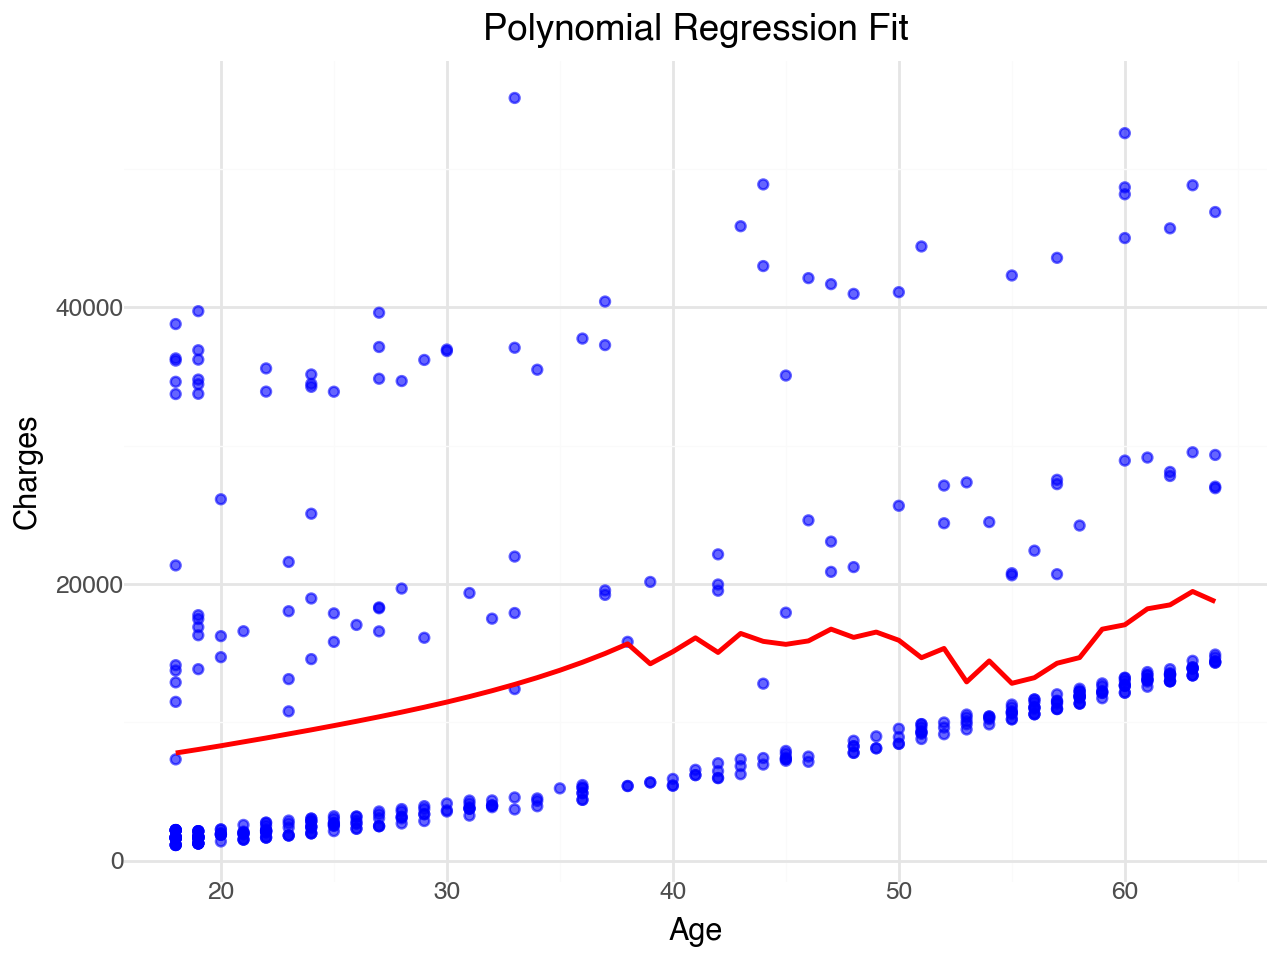

In [136]:
X = insData[["age", "bmi"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
bmi_coefficent = lr_fit.coef_[0,1]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"bmi Coefficient: {bmi_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))

# Make predictions on the test set
y_pred_test = lr_fit.predict(X_test)

# Calculate residuals on the test set
residuals = y_test - y_pred_test

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "Predicted Charges": y_pred_test.flatten(),
    "Residuals": residuals.values.flatten()
})

# Plot residuals
residual_plot = (
    ggplot(plot_data, aes(x="Predicted Charges", y="Residuals")) +
    geom_point(color="blue", alpha=0.6) +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title="Residual Plot", x="Predicted Charges", y="Residuals") +
    theme_minimal()
)

print(residual_plot)

<p> The addition of bmi into the model does slightly improve the model in terms R^2 value increasing from 0.09 to 0.12. Although the inclusion of another variable will increase R^2 no matter so perhaps it is not the bet way to compare the models. In respects to mean squared error the value decreased from 129000000 to 123000000.<p>

### age^2 

Intercept: [929.55476036]
Age Coefficient: 433.8518100302772
age2 Coefficient: -2.831196525187483
0.08078180382323752
0.15484891859179484
137520372.44573674
95476285.11430345
Intercept: [929.55476036]
Age Coefficient: 433.8518100302772
age2 Coefficient: -2.831196525187483
0.08078180382323752
0.15484891859179484
137520372.44573674
95476285.11430345


<positron-console-cell-125>:55: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


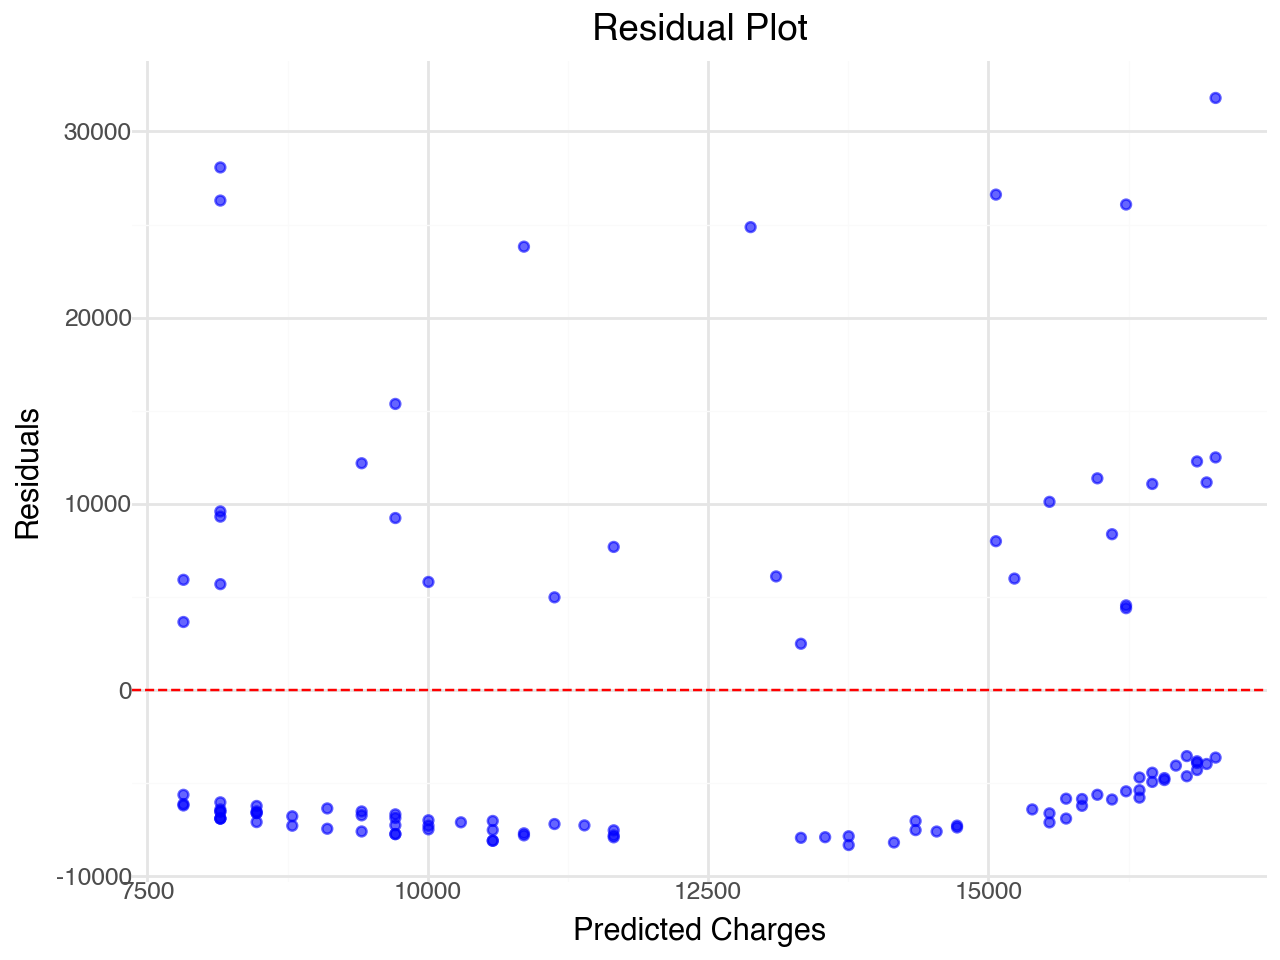

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


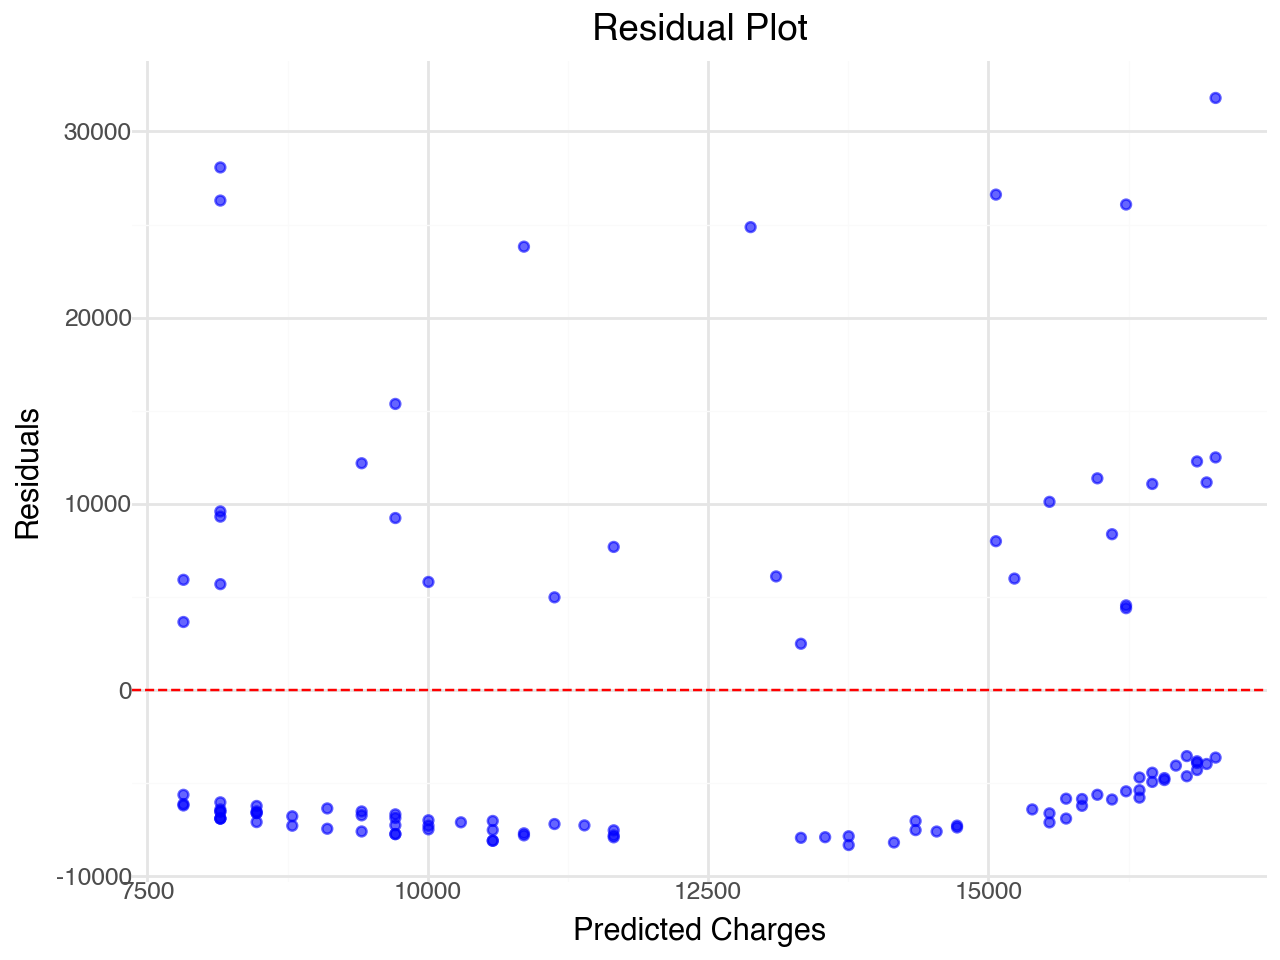

In [125]:
insData['age2']=insData['age']**2


X = insData[["age", "age2"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
age2_coefficent = lr_fit.coef_[0,1]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"age2 Coefficient: {age2_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))




### Age^4

In [93]:
insData['age2']=insData['age']**2
insData['age3']=insData['age']**3
insData['age4']=insData['age']**4



X = insData[["age", "age2","age3","age4"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
age2_coefficent = lr_fit.coef_[0,1]
age3_coefficent = lr_fit.coef_[0,2]
age4_coefficent = lr_fit.coef_[0,3]

print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"age2 Coefficient: {age2_coefficent}")
print(f"age3 Coefficient: {age3_coefficent}")
print(f"age4 Coefficient: {age4_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))

Intercept: [56081.06007309]
Age Coefficient: -6593.310908112155
age2 Coefficient: 309.5429223683001
age3 Coefficient: -5.741491408427204
age4 Coefficient: 0.03715160672917816
0.08863090584808542
0.16314781950825819
136346101.26799986
94538762.52518791
Intercept: [56081.06007309]
Age Coefficient: -6593.310908112155
age2 Coefficient: 309.5429223683001
age3 Coefficient: -5.741491408427204
age4 Coefficient: 0.03715160672917816
0.08863090584808542
0.16314781950825819
136346101.26799986
94538762.52518791


### age^12

Intercept: [6151.98060025]
Age Coefficient: 8.85354253303042e-08
age2 Coefficient: 6.645427159076833e-06
age3 Coefficient: 5.7053871130994296e-05
age4 Coefficient: 0.0008134355629764652
Age5 Coefficient: 0.0065539751458273425
age6 Coefficient: -0.0006559879665534741
age7 Coefficient: 2.7273378165197092e-05
age8 Coefficient: -5.746554868677876e-07
Age9 Coefficient: 6.045306633969264e-09
age10 Coefficient: -2.5205720269678047e-11
age11 Coefficient: 5.572060843612452e-17
age12 Coefficient: 1.2037498571611162e-16
0.09155853164478667
0.15328856436455507
135908111.47230318
95652557.53275794
Intercept: [6151.98060025]
Age Coefficient: 8.85354253303042e-08
age2 Coefficient: 6.645427159076833e-06
age3 Coefficient: 5.7053871130994296e-05
age4 Coefficient: 0.0008134355629764652
Age5 Coefficient: 0.0065539751458273425
age6 Coefficient: -0.0006559879665534741
age7 Coefficient: 2.7273378165197092e-05
age8 Coefficient: -5.746554868677876e-07
Age9 Coefficient: 6.045306633969264e-09
age10 Coefficient: 

<positron-console-cell-133>:89: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


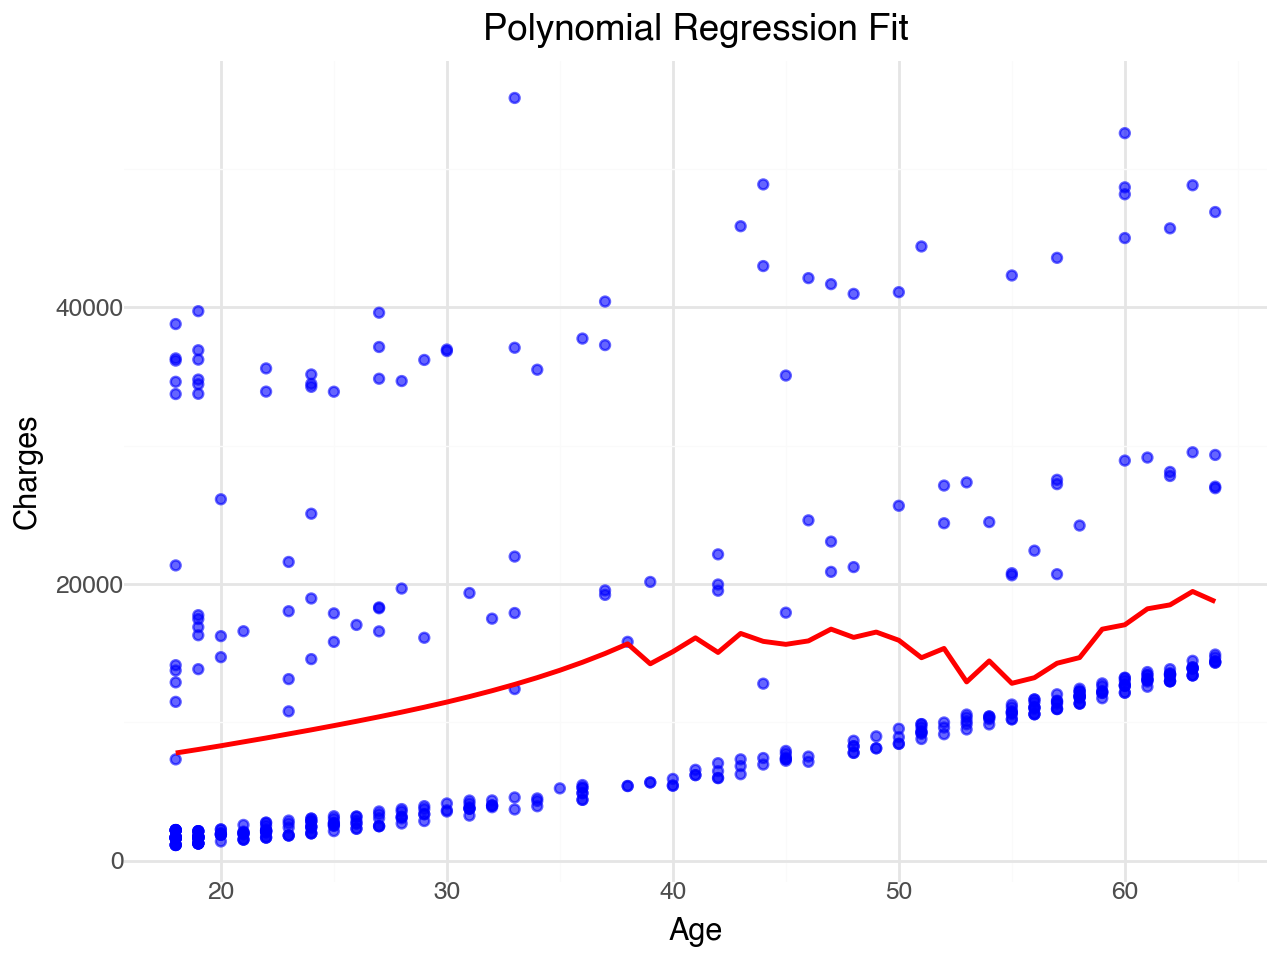

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


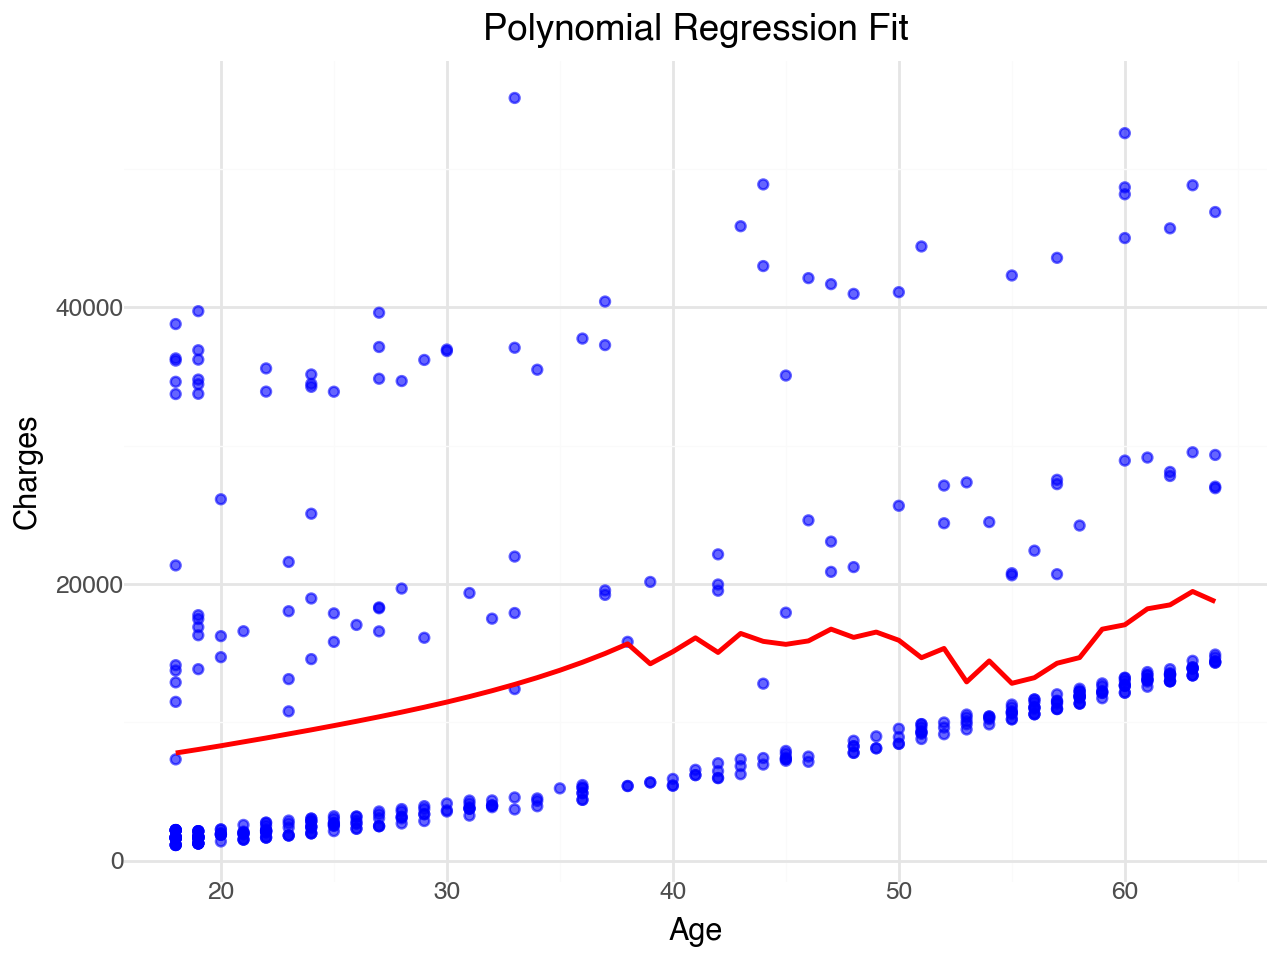

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


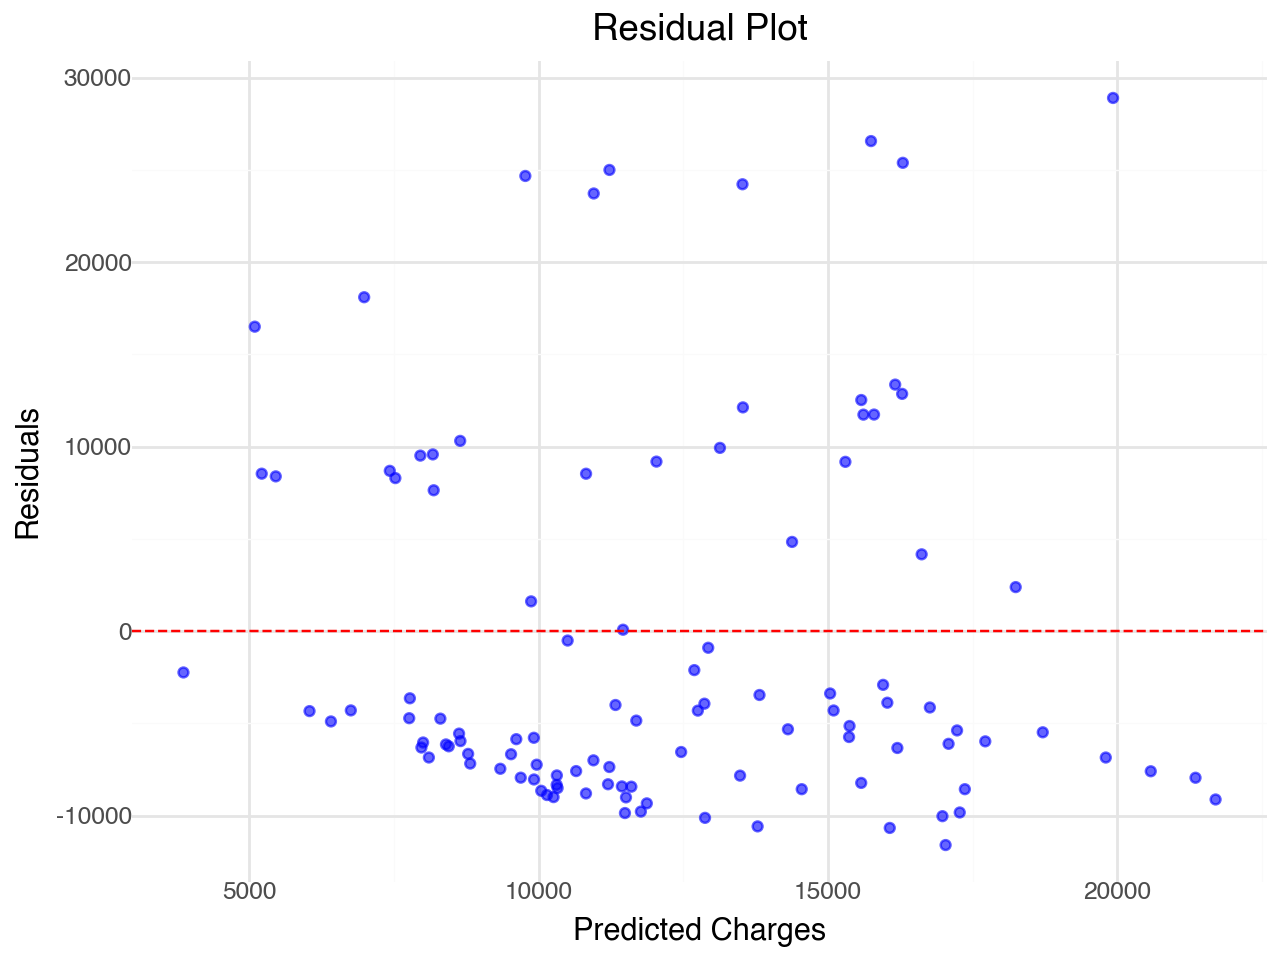

In [133]:
insData['age2']=insData['age']**2
insData['age3']=insData['age']**3
insData['age4']=insData['age']**4
insData['age5']=insData['age']**5
insData['age6']=insData['age']**6
insData['age7']=insData['age']**7
insData['age8']=insData['age']**8
insData['age9']=insData['age']**9
insData['age10']=insData['age']**10
insData['age11']=insData['age']**11
insData['age12']=insData['age']**12


X = insData[["age", "age2","age3","age4","age5","age6","age7","age8","age9","age10","age11","age12"]]
y = insData[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= seed)

lr=LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


intercept = lr_fit.intercept_
age_coefficient = lr_fit.coef_[0,0]
age2_coefficent = lr_fit.coef_[0,1]
age3_coefficent = lr_fit.coef_[0,2]
age4_coefficent = lr_fit.coef_[0,3]
age5_coefficient = lr_fit.coef_[0,4]
age6_coefficent = lr_fit.coef_[0,5]
age7_coefficent = lr_fit.coef_[0,6]
age8_coefficent = lr_fit.coef_[0,7]
age9_coefficient = lr_fit.coef_[0,8]
age10_coefficent = lr_fit.coef_[0,9]
age11_coefficent = lr_fit.coef_[0,10]
age12_coefficent = lr_fit.coef_[0,11]


print(f"Intercept: {intercept}")
print(f"Age Coefficient: {age_coefficient}")
print(f"age2 Coefficient: {age2_coefficent}")
print(f"age3 Coefficient: {age3_coefficent}")
print(f"age4 Coefficient: {age4_coefficent}")
print(f"Age5 Coefficient: {age5_coefficient}")
print(f"age6 Coefficient: {age6_coefficent}")
print(f"age7 Coefficient: {age7_coefficent}")
print(f"age8 Coefficient: {age8_coefficent}")
print(f"Age9 Coefficient: {age9_coefficient}")
print(f"age10 Coefficient: {age10_coefficent}")
print(f"age11 Coefficient: {age11_coefficent}")
print(f"age12 Coefficient: {age12_coefficent}")


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))


y = insData["charges"].values.ravel()

# Make predictions on the entire dataset for plotting
y_pred_all = lr_fit.predict(X).ravel()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "age": insData["age"],
    "charges": y,
    "predicted_charges": y_pred_all
})

# Sort data by age for a smooth line plot
plot_data = plot_data.sort_values(by="age")

# Plot the data
prediction_plot = (
    ggplot(plot_data, aes(x="age")) +
    geom_point(aes(y="charges"), color="blue", alpha=0.6) +       
    geom_line(aes(y="predicted_charges"), color="red", size=1) +  
    labs(title="Polynomial Regression Fit", x="Age", y="Charges") +
    theme_minimal()
)

print(prediction_plot)

<p> The models with non linear age variables do not add any aditional value to the model. The R^2 values barely increase despite adding more to the model, and the MSE does not decrease in any meaningful way. I would just stick with the origianl linear age without and additional terms. <p>

### Part Four: New data

In [56]:
insData2 = pd.read_csv('/Users/rileysallander/Desktop/ML/ML554/Data/insurance_costs_1.csv')

insData2.describe(include='all')

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first') 

cols_to_encode = ['sex', 'smoker', 'region']

encoded_data = encoder.fit_transform(insData2[cols_to_encode])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

insData2 = pd.concat([insData2.drop(columns=cols_to_encode), encoded_df], axis=1)

print(insData2)



     age     bmi      charges  ...  region_northwest  region_southeast  region_southwest
0     19  27.900  16884.92400  ...               0.0               0.0               1.0
1     33  22.705  21984.47061  ...               1.0               0.0               0.0
2     32  28.880   3866.85520  ...               1.0               0.0               0.0
3     31  25.740   3756.62160  ...               0.0               1.0               0.0
4     60  25.840  28923.13692  ...               1.0               0.0               0.0
..   ...     ...          ...  ...               ...               ...               ...
426   23  33.400  10795.93733  ...               0.0               0.0               1.0
427   18  31.920   2205.98080  ...               0.0               0.0               0.0
428   18  36.850   1629.83350  ...               0.0               1.0               0.0
429   21  25.800   2007.94500  ...               0.0               0.0               1.0
430   61  29.070  291

#### age 

In [88]:
XTrain = insData[["age"]]
yTrain = insData[["charges"]]

XTest = insData2[["age"]]
yTest = insData2[["charges"]]

lr=LinearRegression()

lr_fit = lr.fit(XTrain,yTrain)

y_pred_lr = lr_fit.predict(XTest)

y_pred_lrTrain = lr_fit.predict(XTrain)


print("Training R^2 Score:", r2_score(yTrain, y_pred_lrTrain))
print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Training Mean Squared Error:", mean_squared_error(yTrain, y_pred_lrTrain))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))

Training R^2 Score: 0.09938105452062695
Testing R^2 Score: 0.09938105452062695
Training Mean Squared Error: 126739267.9102639
Testing Mean Squared Error: 126739267.9102639
Training R^2 Score: 0.09938105452062695
Testing R^2 Score: 0.09938105452062695
Training Mean Squared Error: 126739267.9102639
Testing Mean Squared Error: 126739267.9102639


### age + bmi

In [79]:
XTrain = insData[["age","bmi"]]
yTrain = insData[["charges"]]

XTest = insData2[["age","bmi"]]
yTest = insData2[["charges"]]

lr=LinearRegression()

lr_fit = lr.fit(XTrain,yTrain)

y_pred_lr = lr_fit.predict(XTest)

y_pred_lrTrain = lr_fit.predict(XTrain)


print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))


Training R^2 Score: 0.12032144234129338
Testing R^2 Score: 0.12032144234129338
Training Mean Squared Error: 123792439.58129103
Testing Mean Squared Error: 123792439.58129103
Training R^2 Score: 0.12032144234129338
Testing R^2 Score: 0.12032144234129338
Training Mean Squared Error: 123792439.58129103
Testing Mean Squared Error: 123792439.58129103


### (age + bmi)interaction

In [80]:
XTrain = insData[["age","bmi","smoker_yes"]]
yTrain = insData[["charges"]]

XTest = insData2[["age","bmi","smoker_yes"]]
yTest = insData2[["charges"]]

lr=LinearRegression()

lr_fit = lr.fit(XTrain,yTrain)

y_pred_lr = lr_fit.predict(XTest)

y_pred_lrTrain = lr_fit.predict(XTrain)


print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))

Training R^2 Score: 0.7810467724680946
Testing R^2 Score: 0.7810467724680946
Training Mean Squared Error: 30812111.9406528
Testing Mean Squared Error: 30812111.9406528
Training R^2 Score: 0.7810467724680946
Testing R^2 Score: 0.7810467724680946
Training Mean Squared Error: 30812111.9406528
Testing Mean Squared Error: 30812111.9406528


In [114]:

insData["age_smoker"] = insData["age"] * insData["smoker_yes"]
insData["bmi_smoker"] = insData["bmi"] * insData["smoker_yes"]

XTrain = insData[["age_smoker", "bmi_smoker"]]
yTrain = insData[["charges"]]

# Create interaction terms in the test data
insData2["age_smoker"] = insData2["age"] * insData2["smoker_yes"]
insData2["bmi_smoker"] = insData2["bmi"] * insData2["smoker_yes"]

XTest = insData2[["age_smoker", "bmi_smoker"]]
yTest = insData2[["charges"]]

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(XTrain, yTrain)

# Make predictions for both training and test sets
y_pred_lrTrain = lr_fit.predict(XTrain)
y_pred_lr = lr_fit.predict(XTest)

# Calculate and print R^2 scores and Mean Squared Errors
print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))



Testing R^2 Score: 0.7253050837740997
Testing Mean Squared Error: 38656340.45996119
Testing R^2 Score: 0.7253050837740997
Testing Mean Squared Error: 38656340.45996119


### age + bmi + age * smoker + bmi * smoker 

Testing R^2 Score: 0.8672991020173331
Testing Mean Squared Error: 18674284.77468444
Testing R^2 Score: 0.8672991020173331
Testing Mean Squared Error: 18674284.77468444


<positron-console-cell-130>:47: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


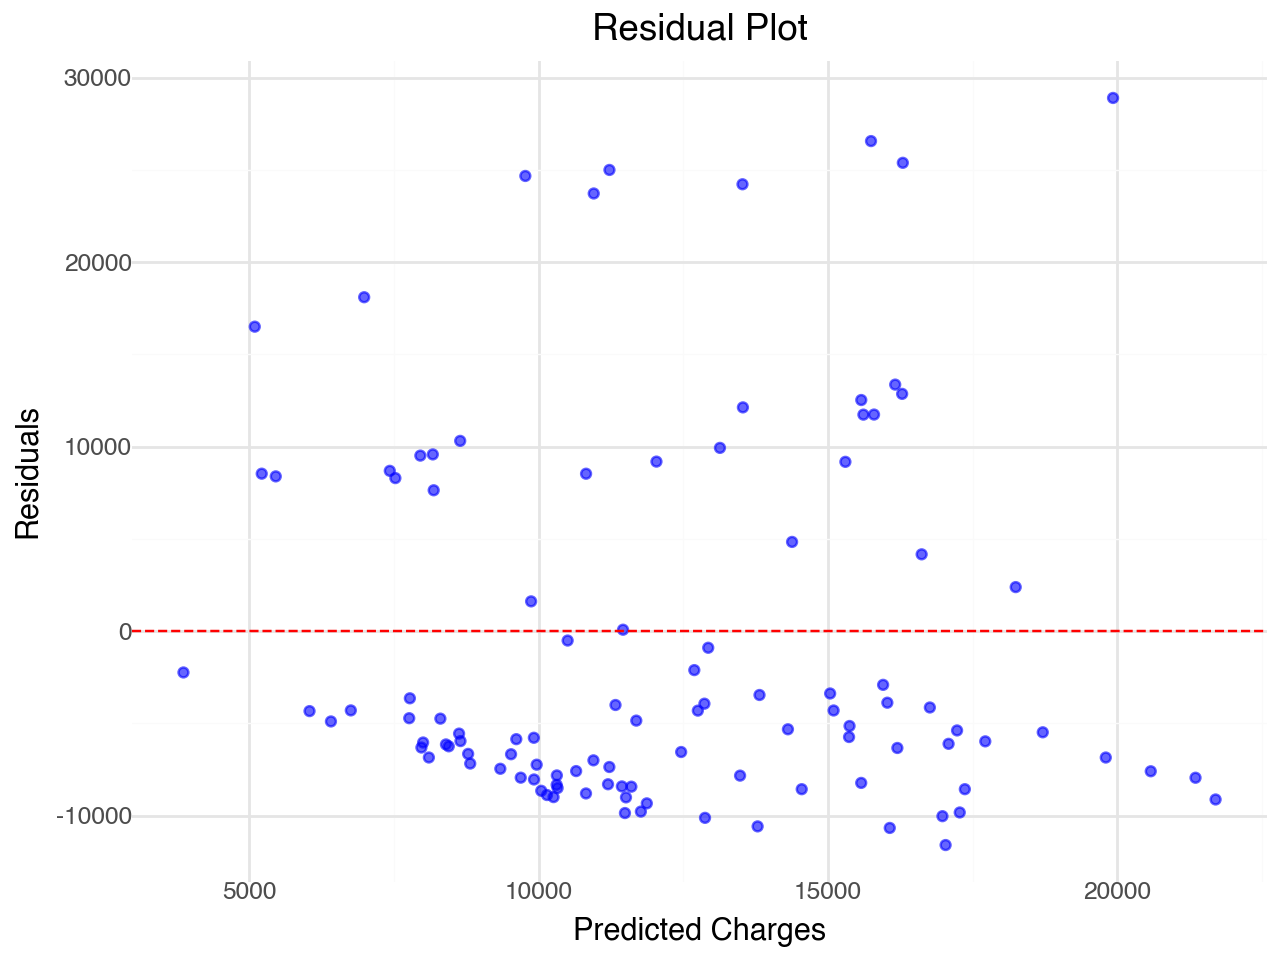

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


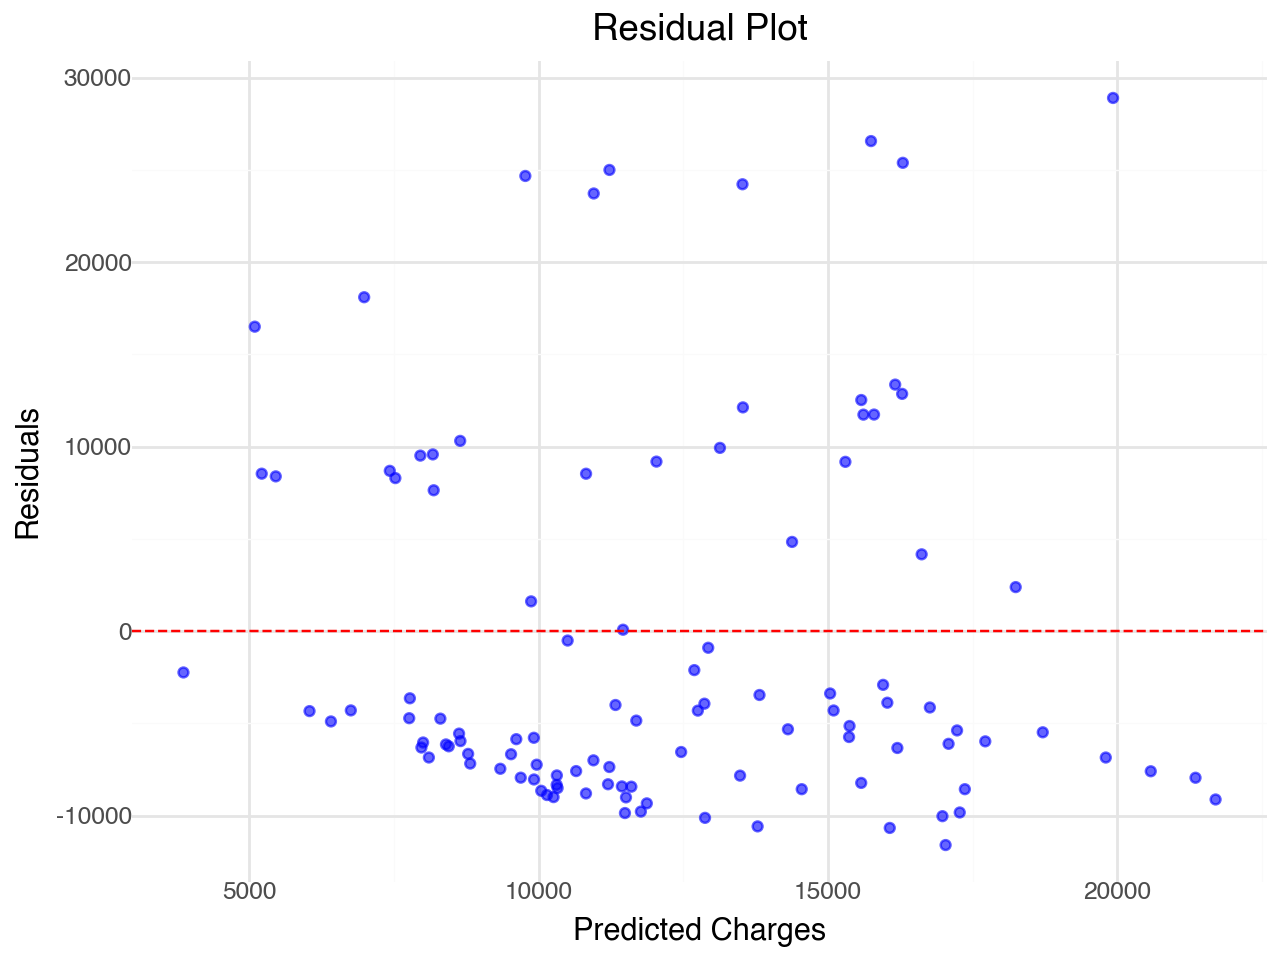

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assuming 'insData' and 'insData2' are your DataFrames

# Add the interaction terms in the training data
insData["age_smoker"] = insData["age"] * insData["smoker_yes"]
insData["bmi_smoker"] = insData["bmi"] * insData["smoker_yes"]

XTrain = insData[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]]
yTrain = insData[["charges"]]

# Add the interaction terms in the test data
insData2["age_smoker"] = insData2["age"] * insData2["smoker_yes"]
insData2["bmi_smoker"] = insData2["bmi"] * insData2["smoker_yes"]

XTest = insData2[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]]
yTest = insData2[["charges"]]

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(XTrain, yTrain)

# Make predictions for both training and test sets
y_pred_lrTrain = lr_fit.predict(XTrain)
y_pred_lr = lr_fit.predict(XTest)

# Calculate and print R^2 scores and Mean Squared Errors
print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))



plot_data = pd.DataFrame({
    "Predicted Charges": y_pred_test.ravel(),
    "Residuals": residuals.values.ravel()
})

residual_plot = (
    ggplot(plot_data, aes(x="Predicted Charges", y="Residuals")) +
    geom_point(color="blue", alpha=0.6) +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title="Residual Plot", x="Predicted Charges", y="Residuals") +
    theme_minimal()
)
print(residual_plot)



<p> The best model is the model including the interaction term of smoker with interaction between both bmi and age with a MSE of 18674284 the loweset of the possible options. <p>


### Full Exploration 

Testing R^2 Score: 0.8675909345872247
Testing Mean Squared Error: 18633216.744252615
Testing R^2 Score: 0.8675909345872247
Testing Mean Squared Error: 18633216.744252615


<positron-console-cell-135>:47: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


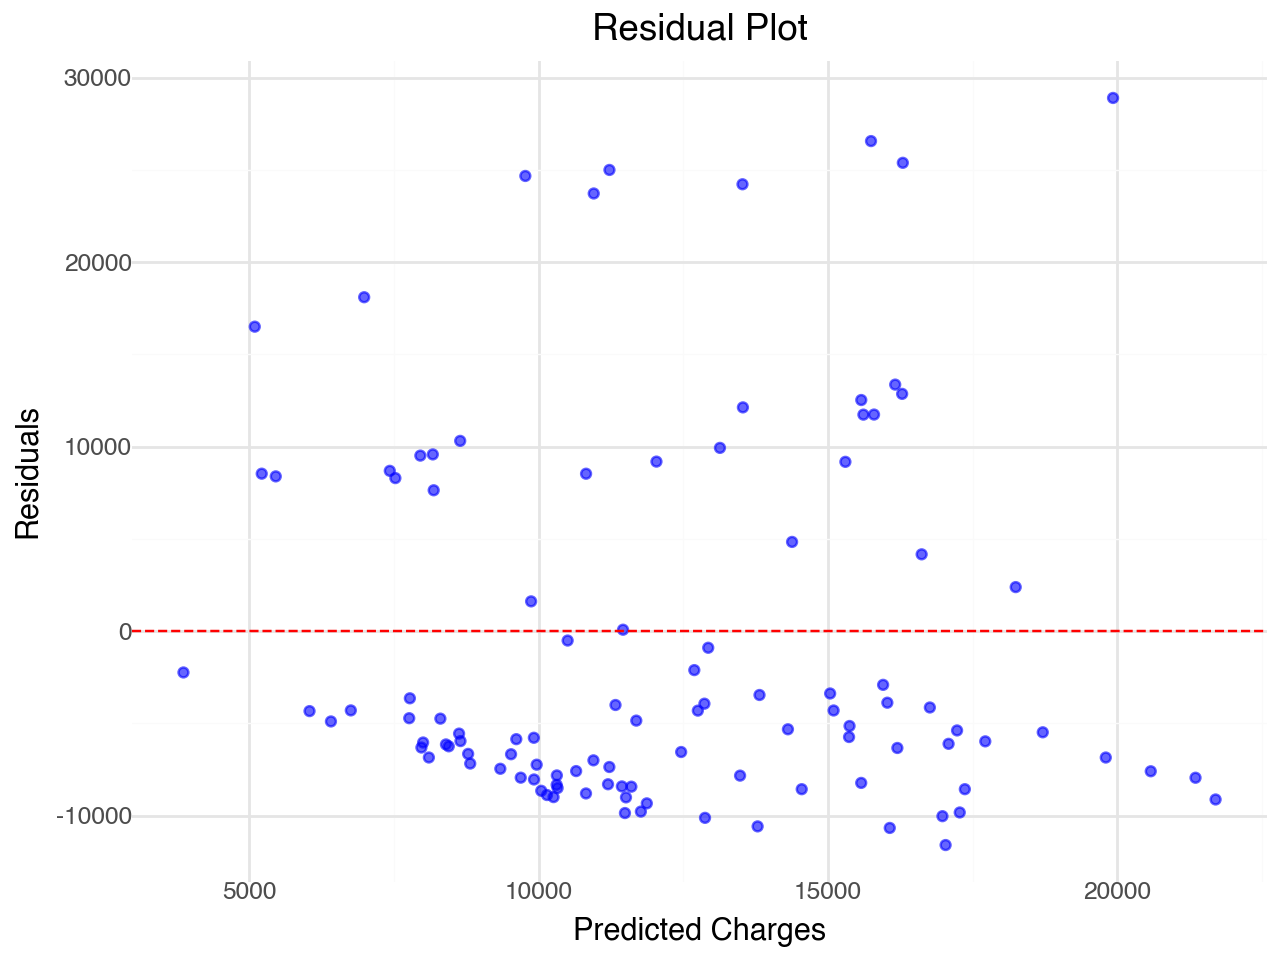

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


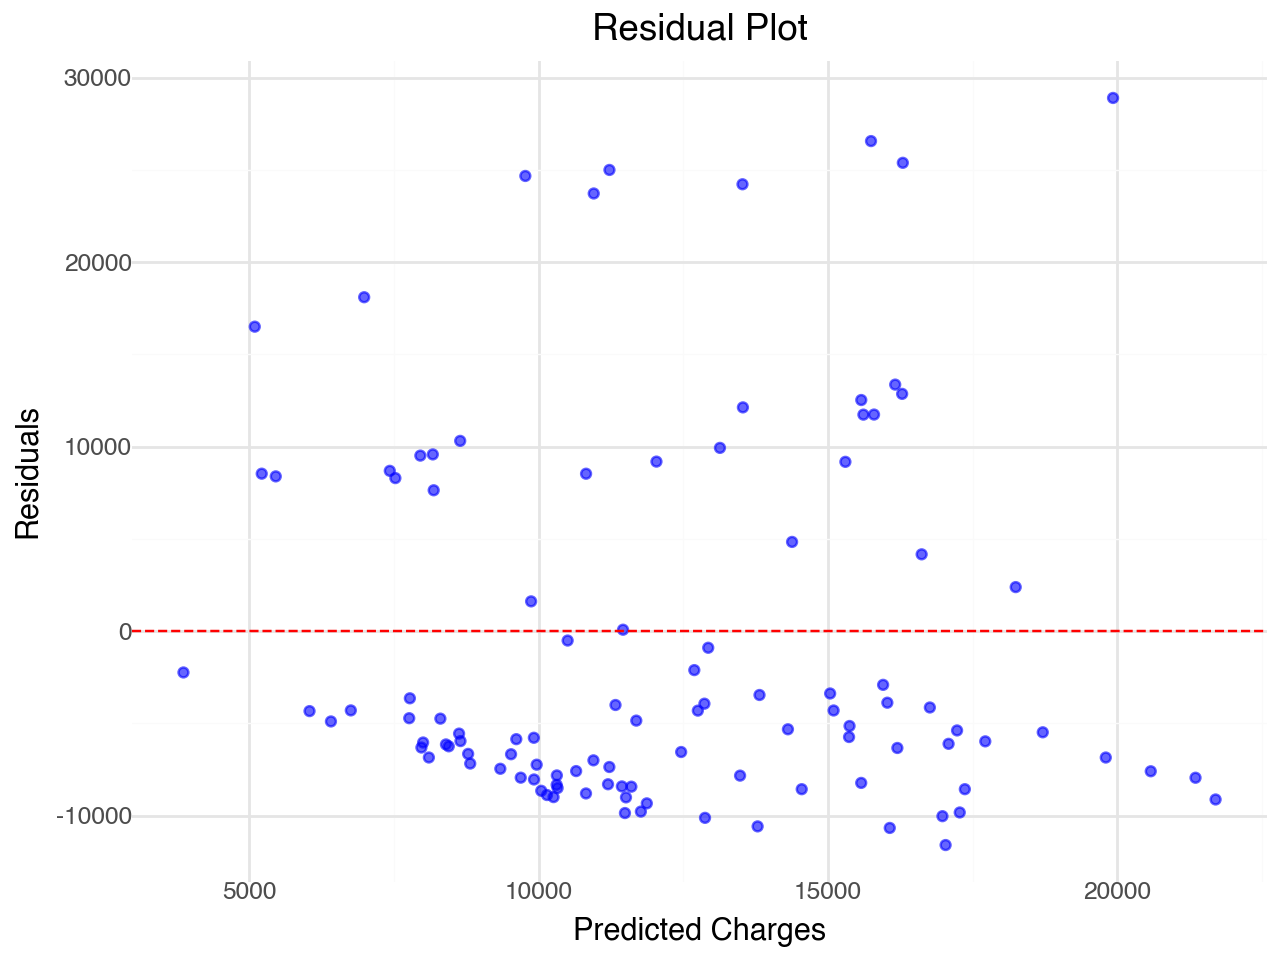

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


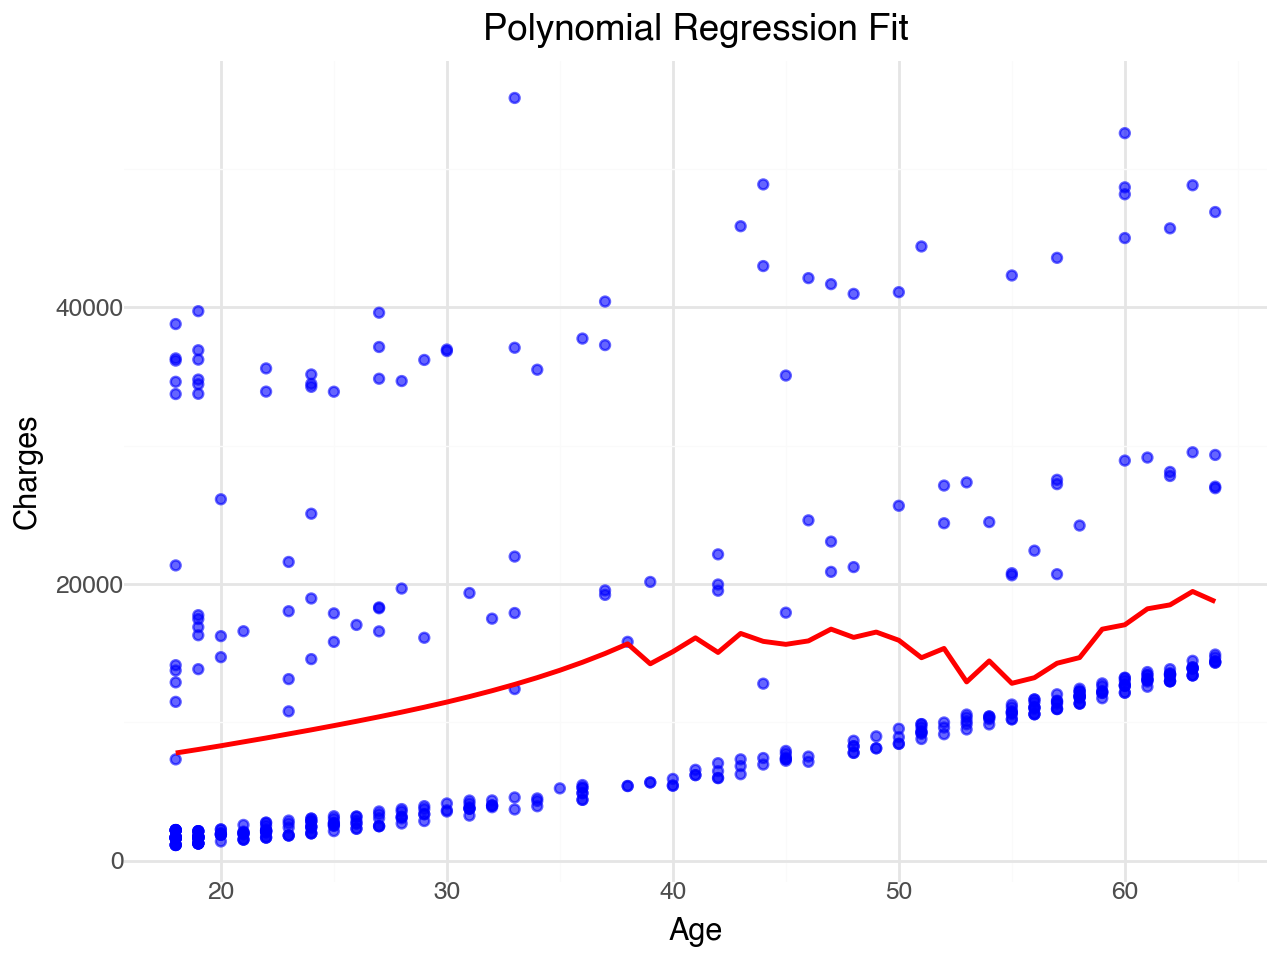

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assuming 'insData' and 'insData2' are your DataFrames

# Add the interaction terms in the training data
insData["age_smoker"] = insData["age"] * insData["smoker_yes"]
insData["bmi_smoker"] = insData["bmi"] * insData["smoker_yes"]

XTrain = insData[["age", "bmi", "sex_male", "smoker_yes", "age_smoker", "bmi_smoker",]]
yTrain = insData[["charges"]]

# Add the interaction terms in the test data
insData2["age_smoker"] = insData2["age"] * insData2["smoker_yes"]
insData2["bmi_smoker"] = insData2["bmi"] * insData2["smoker_yes"]

XTest = insData2[["age", "bmi", "sex_male", "smoker_yes", "age_smoker", "bmi_smoker"]]
yTest = insData2[["charges"]]

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(XTrain, yTrain)

# Make predictions for both training and test sets
y_pred_lrTrain = lr_fit.predict(XTrain)
y_pred_lr = lr_fit.predict(XTest)

# Calculate and print R^2 scores and Mean Squared Errors
print("Testing R^2 Score:", r2_score(yTest, y_pred_lr))
print("Testing Mean Squared Error:", mean_squared_error(yTest, y_pred_lr))



plot_data = pd.DataFrame({
    "Predicted Charges": y_pred_test.ravel(),
    "Residuals": residuals.values.ravel()
})

residual_plot = (
    ggplot(plot_data, aes(x="Predicted Charges", y="Residuals")) +
    geom_point(color="blue", alpha=0.6) +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title="Residual Plot", x="Predicted Charges", y="Residuals") +
    theme_minimal()
)
print(residual_plot)
